In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

## Input

- composizione frazionaria dei film
- composizione frazionaria dei contenitori per liquidi
- composizione frazionaria degli imballaggi rigidi
- composizione frazionaria di altro materiale
- composizione merceologica plasmix mix

In [2]:
# composizione frazionaria dei film
t = np.array([
    0.2, # pp
    0.6, # ldpe
    0.1, # hdpe
    0.1, # pet
    0.0  # altro
])   

# composizione frazionaria dei contenitori per liquidi (CPL)
u = np.array([0.63, 0, 0, 0.37, 0]) 

# composizione frazionaria degli imballaggi rigidi
v = np.array([0, 0, 1, 0, 0])           

# composizione frazionaria di altro materiale
z = np.array([0, 0, 0, 0, 1])

# composizione merceologica Plasmix Mix 1(3D+Ing) in ordine: film, CPL, PET, altro
merc = np.array([32.47, 28.68, 11, 27.82])

In [3]:
# matrice delle classi merceologiche
classi_merc = np.vstack([t, u, v, z])

# composizione merceologica del flusso in ingresso secondo la composizione dei polimeri PE, PP, PET ed altre frazioni
IN_esteso = merc @ classi_merc

In [4]:
# composizione per tipologia di polimeri (ristretta a quattro classi)
IN = np.array([
    IN_esteso[0],                # PP
    IN_esteso[1] + IN_esteso[2], # PE (LDPE+HDPE)
    IN_esteso[3],                # PET
    IN_esteso[4]                 # altro
])

## Vagliatura

In [5]:
# input
pt_LS = 0.95
pu_LS = 0.98
pv_LS = 0.82
pz_LS = 0.99

# matrice per separazione vaglio 220 mm
A_LS = np.array([
    [ 1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,    1,    1,    1,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,    0,    0,    0,   -1,    0,    0,    0,   -1,    0,    0,    0],
    [ 0,    1,    0,    0,    0,   -1,    0,    0,    0,   -1,    0,    0],
    [ 0,    0,    1,    0,    0,    0,   -1,    0,    0,    0,   -1,    0],
    [ 0,    0,    0,    1,    0,    0,    0,   -1,    0,    0,    0,   -1],
    [-pt_LS,0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0],  # -95% misura relativa al vettore t passata da input
    [ 0,   -pu_LS,0,    0,    0,    1,    0,    0,    0,    0,    0,    0],  # -98% misura relativa al vettore u passata da input
    [ 0,    0,   -pv_LS,0,    0,    0,    1,    0,    0,    0,    0,    0],  # -82% misura relativa al vettore v passata da input
    [ 0,    0,    0,   -pz_LS,0,    0,    0,    1,    0,    0,    0,    0]   # -99% misura relativa al vettore z passata da input
])

# input plastiche da plasmix 
b_LS = np.array([
     IN[0],        # PP
     IN[2],        # PET
     IN[1],        # PE (LDPE+HDPE) 
     np.sum(IN),   # massa complessiva dello stream
      0, 
      0, 
      0, 
      0, 
      0, 
      0, 
      0, 
      0
])

In [6]:
x_LS = np.linalg.solve(A_LS, b_LS)
IN = np.sum(x_LS[:4])
out_LS = np.sum(x_LS[4:8])
scarto_LS = np.sum(x_LS[8:])
Y_LS = out_LS/IN

## Separazione balistica

In [7]:
# input
pt_BS = 0.70
pu_BS = 0.92
pv_BS = 0.90
pz_BS = 0.10

# matrice per separazione vaglio balistico con scarto 60 mm
A_BS = np.array([
    [ 1,    0,    0,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,    1,    0,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,    0,    1,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,    1,    1,     1,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,    0,    0,     0,   -1,    0,    0,    0,   -1,    0,    0,    0],
    [ 0,    1,    0,     0,    0,   -1,    0,    0,    0,   -1,    0,    0],
    [ 0,    0,    1,     0,    0,    0,   -1,    0,    0,    0,   -1,    0],
    [ 0,    0,    0,     1,    0,    0,    0,   -1,    0,    0,    0,   -1],
    [-pt_BS,0,    0,     0,    1,    0,    0,    0,    0,    0,    0,    0], # -70% misura relativa al vettore t passata da input
    [ 0,   -pu_BS,0,     0,    0,    1,    0,    0,    0,    0,    0,    0], # -92% misura relativa al vettore t passata da input
    [ 0,    0,   -pv_BS, 0,    0,    0,    1,    0,    0,    0,    0,    0], # -90% misura relativa al vettore t passata da input
    [ 0,    0,    0,   -pz_BS, 0,    0,    0,    1,    0,    0,    0,    0]  # -10% misura relativa al vettore t passata da input
])

b_BS = np.array([
    x_LS[4],
    x_LS[5],
    x_LS[6],
    out_LS,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
])

In [8]:
x_BS = np.linalg.solve(A_BS, b_BS)
out_BS = np.sum(x_BS[4:8])
scarto_BS = np.sum(x_BS[8:])
Y_BS = out_BS/out_LS

## NIR PP

In [9]:
# input
pt_PP = 0.60
pu_PP = 0.10
pv_PP = 0.20
pz_PP = 0.20

# matrice per separazione NIR PP 4 flussi ingresso 
A_PP = np.array([
    [ 1,    0,    0,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,    1,    0,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,    0,    1,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,    1,    1,     1,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,    0,    0,     0,   -1,    0,    0,    0,   -1,    0,    0,    0],
    [ 0,    1,    0,     0,    0,   -1,    0,    0,    0,   -1,    0,    0],
    [ 0,    0,    1,     0,    0,    0,   -1,    0,    0,    0,   -1,    0],
    [ 0,    0,    0,     1,    0,    0,    0,   -1,    0,    0,    0,   -1],
    [-pt_PP,0,    0,     0,    1,    0,    0,    0,    0,    0,    0,    0], # -60% misura relativa al vettore t passata da input
    [ 0,   -pu_PP,0,     0,    0,    1,    0,    0,    0,    0,    0,    0], # -10% misura relativa al vettore t passata da input
    [ 0,    0,   -pv_PP, 0,    0,    0,    1,    0,    0,    0,    0,    0], # -20% misura relativa al vettore t passata da input
    [ 0,    0,    0,   -pz_PP, 0,    0,    0,    1,    0,    0,    0,    0]  # -20% misura relativa al vettore t passata da input
])

b_PP = np.array([
    x_BS[4],
    x_BS[5],
    x_BS[6],
    out_BS,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
])

In [10]:
x_PP = np.linalg.solve(A_PP, b_PP)
out_PP = np.sum(x_PP[4:8])
scarto_PP = np.sum(x_PP[8:])
Y_PP = out_PP/out_BS
grade_PP = x_PP[4] / out_PP

## NIR PET

In [11]:
# input
pt_PET = 0.10
pu_PET = 0.65
pv_PET = 0.05
pz_PET = 0.20

# matrice per separazione NIR PET 4 flussi ingresso
A_PET = np.array([
    [ 1,     0,     0,      0,      0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,     1,     0,      0,      0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,     0,     1,      0,      0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,     1,     1,      1,      0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,     0,     0,      0,     -1,    0,    0,    0,   -1,    0,    0,    0],
    [ 0,     1,     0,      0,      0,   -1,    0,    0,    0,   -1,    0,    0],
    [ 0,     0,     1,      0,      0,    0,   -1,    0,    0,    0,   -1,    0],
    [ 0,     0,     0,      1,      0,    0,    0,   -1,    0,    0,    0,   -1],
    [-pt_PET,0,     0,      0,      1,    0,    0,    0,    0,    0,    0,    0], # -10% misura relativa al vettore t passata da input
    [ 0,    -pu_PET,0,      0,      0,    1,    0,    0,    0,    0,    0,    0], # -65% misura relativa al vettore t passata da input
    [ 0,     0,    -pv_PET, 0,      0,    0,    1,    0,    0,    0,    0,    0], # - 5% misura relativa al vettore t passata da input
    [ 0,     0,     0,     -pz_PET, 0,    0,    0,    1,    0,    0,    0,    0]  # -20% misura relativa al vettore t passata da input
])

b_PET = np.array([
    x_PP[8],
    x_PP[9],
    x_PP[10],
    scarto_PP,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
])

In [12]:
x_PET = np.linalg.solve(A_PET, b_PET)
out_PET = np.sum(x_PET[4:8])
scarto_PET = np.sum(x_PET[8:])
Y_PET = out_PET/scarto_PP
grade_PET = x_PET[5] / out_PET

## NIR PE

In [13]:
# input
pt_PE = 0.05
pu_PE = 0.05
pv_PE = 0.65
pz_PE = 0.04

# matrice per separazione NIR PE 4 flussi ingresso
A_PE = np.array([
    [ 1,     0,     0,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,     1,     0,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 0,     0,     1,     0,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,     1,     1,     1,    0,    0,    0,    0,    0,    0,    0,    0],
    [ 1,     0,     0,     0,   -1,    0,    0,    0,   -1,    0,    0,    0],
    [ 0,     1,     0,     0,    0,   -1,    0,    0,    0,   -1,    0,    0],
    [ 0,     0,     1,     0,    0,    0,   -1,    0,    0,    0,   -1,    0],
    [ 0,     0,     0,     1,    0,    0,    0,   -1,    0,    0,    0,   -1],
    [-pt_PE, 0,     0,     0,    1,    0,    0,    0,    0,    0,    0,    0], # - 5% misura relativa al vettore t passata da input
    [ 0,    -pu_PE, 0,     0,    0,    1,    0,    0,    0,    0,    0,    0], # - 5% misura relativa al vettore t passata da input
    [ 0,     0,    -pv_PE, 0,    0,    0,    1,    0,    0,    0,    0,    0], # -65% misura relativa al vettore t passata da input
    [ 0,     0,     0,    -pz_PE,0,    0,    0,    1,    0,    0,    0,    0]  # - 4% misura relativa al vettore t passata da input
])

b_PE = np.array([
    x_PET[8],
    x_PET[9],
    x_PET[10],
    scarto_PET,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
])

In [14]:
x_PE = np.linalg.solve(A_PE, b_PE)
out_PE = np.sum(x_PE[4:8])
scarto_PE = np.sum(x_PE[8:])
Y_PE = out_PE/scarto_PET
grade_PE = x_PE[6] / out_PE

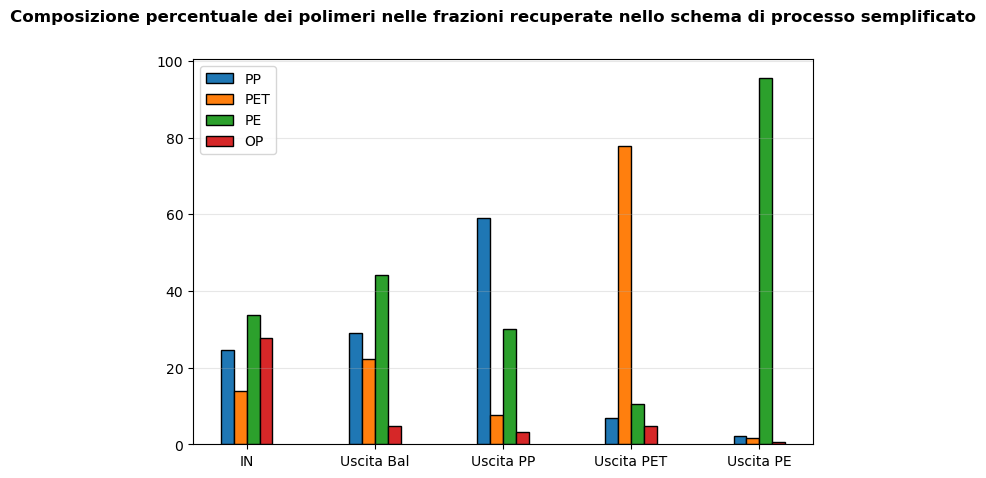

In [15]:
x = np.vstack([
    x_LS[0:4],
    x_BS[4:8] / out_BS * 100,
    x_PP[4:8] / out_PP * 100,
    x_PET[4:8] / out_PET * 100,
    x_PE[4:8] / out_PE * 100
])

labels = ['IN', 'Uscita Bal', 'Uscita PP', 'Uscita PET', 'Uscita PE']
components = ['PP', 'PET', 'PE', 'OP']

n_groups, n_comp = x.shape
bar_width = 0.1
indices = np.arange(n_groups)

plt.figure(figsize=(8, 5))

for index in range(n_comp):
    plt.bar(
        indices + index * bar_width,
        x[:, index],
        bar_width,
        label=components[index],
        edgecolor='k'
    )

plt.xticks(indices + bar_width * (n_comp - 1) / 2, labels)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.suptitle("Composizione percentuale dei polimeri nelle frazioni recuperate nello schema di processo semplificato", fontweight="bold")
plt.savefig("plot1.png")
plt.show()

In [16]:
Y_pre = x_LS[8:12] + x_BS[8:12]
grade_pre = Y_pre / np.sum(Y_pre)

Y_fin = x_PE[8:12]
grade_fin = Y_fin / np.sum(Y_fin)

Y_out = Y_pre + Y_fin
grade_out = Y_out / np.sum(Y_out)

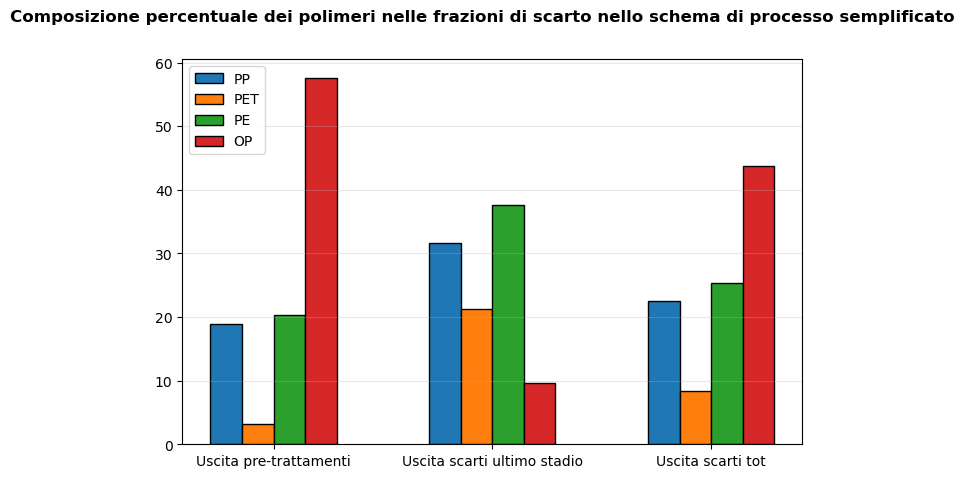

In [17]:
y = np.vstack([
    100 * grade_pre,
    100 * grade_fin,
    100 * grade_out
])

labels = [
    'Uscita pre-trattamenti',
    'Uscita scarti ultimo stadio',
    'Uscita scarti tot'
]

components = ['PP', 'PET', 'PE', 'OP']

n_groups, n_comp = y.shape
bar_width = 0.18
group_spacing = 1.25
indices = np.arange(n_groups) * group_spacing

plt.figure(figsize=(8, 5))

for i in range(n_comp):
    plt.bar(
        indices + (i - (n_comp - 1) / 2) * bar_width,
        y[:, i],
        width=bar_width,
        label=components[i],
        edgecolor='k'
    )

plt.xticks(indices, labels)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.suptitle("Composizione percentuale dei polimeri nelle frazioni di scarto nello schema di processo semplificato", fontweight="bold")
plt.savefig("plot2.png")
plt.show()

In [18]:
b_PE2 = np.array([
    Y_out[0],
    Y_out[1],
    Y_out[2],
    np.sum(Y_out),
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
])


In [19]:
x_PE2 = np.linalg.solve(A_PE, b_PE2)
out_PE2 = np.sum(x_PE2[4:8])
scarto_PE2 = np.sum(x_PE2[8:])
Y_PE2 = out_PE2/scarto_PE2
grade_PE2 = x_PE2[6] / out_PE2

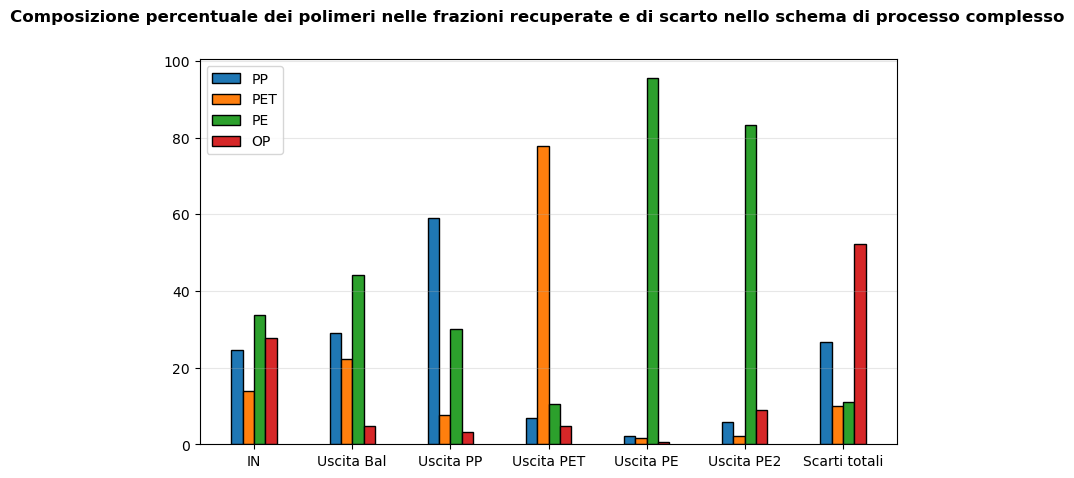

In [20]:
x = np.vstack([
    x_LS[0:4],
    x_BS[4:8]   / out_BS   * 100,
    x_PP[4:8]   / out_PP   * 100,
    x_PET[4:8]  / out_PET  * 100,
    x_PE[4:8]   / out_PE   * 100,
    x_PE2[4:8]  / out_PE2  * 100,
    x_PE2[8:12] / scarto_PE2 * 100
])

labels = [
    'IN',
    'Uscita Bal',
    'Uscita PP',
    'Uscita PET',
    'Uscita PE',
    'Uscita PE2',
    'Scarti totali'
]

components = ['PP', 'PET', 'PE', 'OP']

n_groups, n_comp = x.shape
bar_width = 0.15
group_spacing = 1.3
indices = np.arange(n_groups) * group_spacing

plt.figure(figsize=(9, 5))

for i in range(n_comp):
    plt.bar(
        indices + (i - (n_comp - 1) / 2) * bar_width,
        x[:, i],
        width=bar_width,
        label=components[i],
        edgecolor='k'
    )

plt.xticks(indices, labels)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.suptitle("Composizione percentuale dei polimeri nelle frazioni recuperate e di scarto nello schema di processo complesso", fontweight="bold")
plt.savefig("plot3.png")
plt.show()

## Rappresentazione schema semplificato

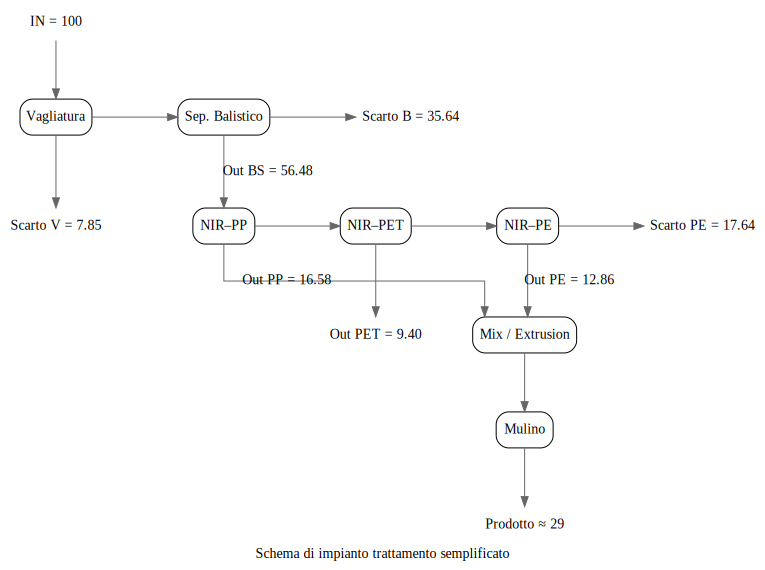

In [24]:
dot = Digraph("Impianto", filename="impianto", format="png")

dot.attr(
    label="Schema di impianto trattamento semplificato",
    fontsize="14",
    rankdir="TB",
    splines="ortho",
    nodesep="0.6",
    ranksep="0.8"
)

# processi (box)
dot.attr("node", shape="box", style="rounded")

dot.node("VAG", "Vagliatura")
dot.node("BS", "Sep. Balistico")
dot.node("PP", "NIR–PP")
dot.node("PET", "NIR–PET")
dot.node("PE", "NIR–PE")
dot.node("MIX", "Mix / Extrusion")
dot.node("MUL", "Mulino")

# testo
dot.attr("node", shape="plaintext")

dot.node("IN", f"IN = {IN:.0f}")
dot.node("OUT", f"Prodotto ≈ {np.sum(out_PP+out_PE):.0f}")

dot.node("SCV", f"Scarto V = {scarto_LS:.2f}")
dot.node("SCB", f"Scarto B = {scarto_BS:.2f}")
dot.node("SCPE", f"Scarto PE = {scarto_PE:.2f}")
dot.node("OPET", f"Out PET = {out_PET:.2f}")

# flusso principale
dot.edge("IN", "VAG", penwidth="1", color="gray40")
dot.edge("VAG", "BS", penwidth="1", color="gray40")

dot.edge("BS", "PP", penwidth="1", color="gray40", label=f"Out BS = {out_BS:.2f}")
dot.edge("PP", "PET", penwidth="1", color="gray40")
dot.edge("PET", "PE", penwidth="1", color="gray40")
dot.edge("PE", "MIX", penwidth="1", color="gray40", label=f"Out PE = {out_PE:.2f}")
dot.edge("PP", "MIX", penwidth="1", color="gray40", label=f"Out PP = {out_PP:.2f}")

dot.edge("MIX", "MUL", penwidth="1", color="gray40")
dot.edge("MUL", "OUT", penwidth="1", color="gray40")

# scarti/output
dot.edge("VAG", "SCV", color="gray40")
dot.edge("BS", "SCB", color="gray40")
dot.edge("PE", "SCPE", color="gray40")
dot.edge("PET", "OPET", color="gray40")

with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("VAG")
    s.node("BS")
    s.node("SCB")

# allineamento NIR
with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("PP")
    s.node("PET")
    s.node("PE")
    s.node("SCPE")

dot.render("Schema di impianto trattamento semplificato")
dot

## Rappresentazione schema complesso

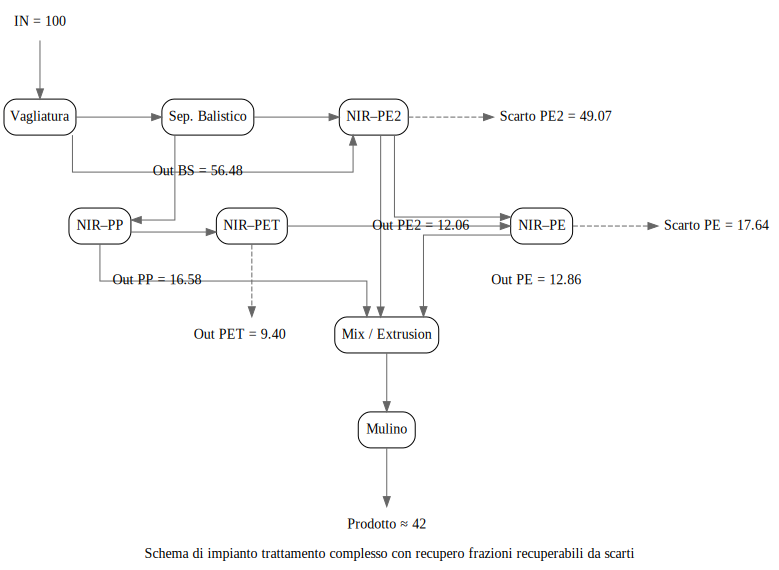

In [25]:
dot = Digraph("Impianto", filename="impianto", format="png")

dot.attr(
    label="Schema di impianto trattamento complesso con recupero frazioni recuperabili da scarti",
    fontsize="14",
    rankdir="TB",
    splines="ortho",
    nodesep="0.6",
    ranksep="0.8"
)

# processi (box)
dot.attr("node", shape="box", style="rounded")

dot.node("VAG", "Vagliatura")
dot.node("BS", "Sep. Balistico")
dot.node("PP", "NIR–PP")
dot.node("PET", "NIR–PET")
dot.node("PE", "NIR–PE")
dot.node("PE2", "NIR–PE2")
dot.node("MIX", "Mix / Extrusion")
dot.node("MUL", "Mulino")

# testo
dot.attr("node", shape="plaintext")

dot.node("IN", f"IN = {IN:.0f}")
dot.node("OUT", f"Prodotto ≈ {np.sum(out_PP+out_PE+out_PE2):.0f}")

dot.node("SCPE", f"Scarto PE = {scarto_PE:.2f}")
dot.node("SCPE2", f"Scarto PE2 = {scarto_PE2:.2f}")
dot.node("OPET", f"Out PET = {out_PET:.2f}")

# flusso principale
dot.edge("IN", "VAG", penwidth="1", color="gray40")
dot.edge("VAG", "BS", penwidth="1", color="gray40")
dot.edge("BS", "PE2", penwidth="1", color="gray40")
dot.edge("VAG", "PE2", penwidth="1", color="gray40")

dot.edge("BS", "PP", penwidth="1", color="gray40", label=f"Out BS = {out_BS:.2f}")

dot.edge("PP", "PET", penwidth="1", color="gray40")
dot.edge("PET", "PE", penwidth="1", color="gray40")
dot.edge("PE2", "PE", penwidth="1", color="gray40")

dot.edge("PE", "MIX", penwidth="1", label=f"Out PE = {out_PE:.2f}", color="gray40")
dot.edge("PE2", "MIX", penwidth="1", label=f"Out PE2 = {out_PE2:.2f}", color="gray40")
dot.edge("PP", "MIX", label=f"Out PP = {out_PP:.2f}", color="gray40")

dot.edge("MIX", "MUL", penwidth="1", color="gray40")
dot.edge("MUL", "OUT", penwidth="1", color="gray40")

# scarti/output
dot.edge("PE", "SCPE", style="dashed", color="gray40")
dot.edge("PE2", "SCPE2", style="dashed", color="gray40")
dot.edge("PET", "OPET", style="dashed", color="gray40")

with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("VAG")
    s.node("BS")
    s.node("PE2")
    s.node("SCPE2")

# allineamento NIR
with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("PP")
    s.node("PET")
    s.node("PE")
    s.node("SCPE")

dot.render("Schema di impianto trattamento complesso con recupero frazioni recuperabili da scarti")
dot